In [1]:
import sys
sys.path.append("../../")

In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import torch
import pyro
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from datetime import timedelta
from tqdm.auto import tqdm
from _dmm import DMM
from utils import StockDataset, normalize
from torch.utils.data import DataLoader
from pyro.infer import SVI, Trace_ELBO, Predictive

In [3]:
# set style of graphs
plt.style.use('ggplot')
from pylab import rcParams
plt.rcParams['figure.dpi'] = 100

In [4]:
df = pd.read_csv('../../stock/AAPL.csv', parse_dates=True, index_col='Date').dropna(how="any")
X_train, X_test = train_test_split(df, test_size=0.1, shuffle=False)

In [5]:
X_train.shape

(1359, 6)

In [6]:
X_test['Close'].shape

(151,)

In [7]:
predictor = DMM()
predictor.fit(X_train, batch_size=24, epochs=10)

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1, Loss: 14502.983651297433
Epoch 2, Loss: 12477.075905936104
Epoch 3, Loss: 1957.4957809448242
Epoch 4, Loss: 804.7811551775251
Epoch 5, Val Loss 57.474937438964844
Epoch 6, Loss: 200.7120670420783
Epoch 7, Loss: 81.92440065315792
Epoch 8, Loss: -10.422819290842328
Epoch 9, Loss: -68.89125388009208
Epoch 10, Val Loss 31.165299097696938
Epoch 11, Loss: -163.89043065479822
Epoch 12, Loss: -196.56294880594527
Epoch 13, Loss: -223.5242156982422
Epoch 14, Loss: -249.11225536891394
Epoch 15, Val Loss 20.668059666951496
Epoch 16, Loss: -282.80413280214583
Epoch 17, Loss: -295.39205619267057
Epoch 18, Loss: -304.2275426047189
Epoch 19, Loss: -315.23281124659945
Epoch 20, Val Loss 20.404708067576088
Epoch 21, Loss: -330.5574676309313
Epoch 22, Loss: -334.2645589624132
Epoch 23, Loss: -340.06292268208097
Epoch 24, Loss: -344.5587181363787
Epoch 25, Val Loss 23.96225595474243
Epoch 26, Loss: -351.15508464404513
Epoch 27, Loss: -354.31019040516446
Epoch 28, Loss: -355.4263139792851
Epoch 29

In [8]:
y_pred = predictor.predict(X_test)

In [9]:
y_pred.shape

(151, 1)

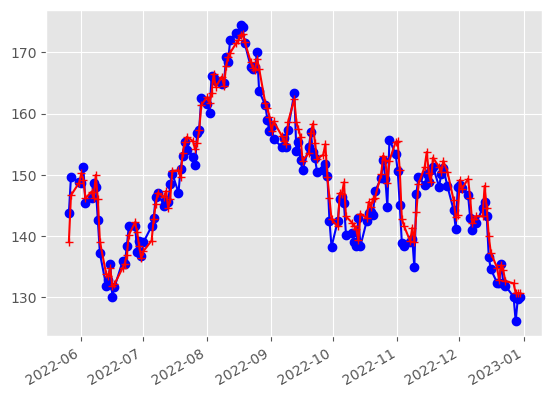

In [10]:
y_test = (X_test['Close']).values 
days = np.array(X_test.index, dtype="datetime64[ms]")
            
fig = plt.figure()
            
axes = fig.add_subplot(111)
axes.plot(days, y_test, 'bo-', label="actual") 
axes.plot(days, y_pred, 'r+-', label="predicted")
            
fig.autofmt_xdate()
            
# plt.legend()
plt.show()

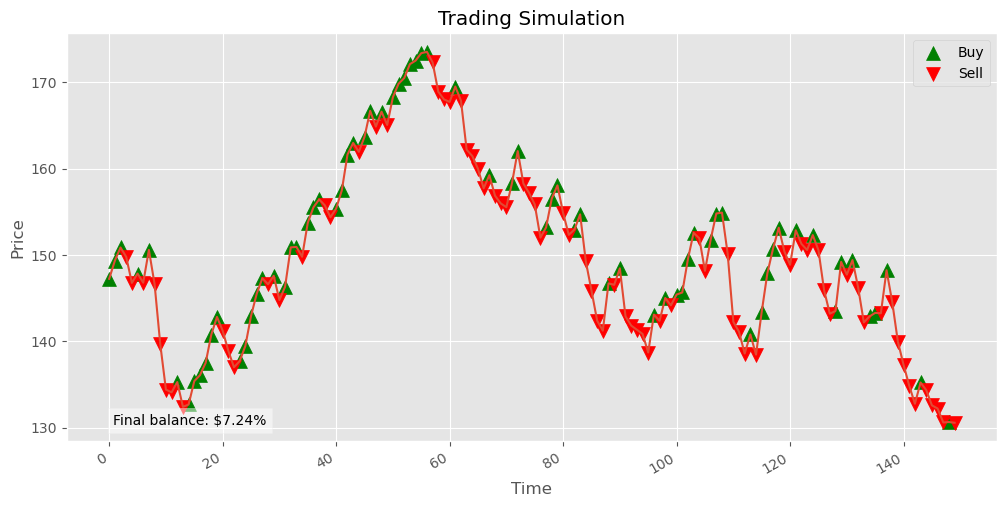

In [11]:
final_balance = predictor.trading_function(x_data=X_test,
                                           shares=10,
                                           initial_balance=10000,
                                           stop_loss=0.2
                                           )